<a href="https://colab.research.google.com/github/Roohiashahzad/git_practice/blob/master/Roohia_Linguistics_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline
!pip install stop-words
from stop_words import get_stop_words
stopwords = get_stop_words('en')
from textblob import Word
import re
import nltk
nltk.download('wordnet')
!pip install scattertext
!python -m spacy download en
!wget https://raw.githubusercontent.com/tylerneylon/explacy/master/explacy.py


!pip install stop-words

from stop_words import get_stop_words
stopwords = get_stop_words('en')

from sklearn.model_selection import train_test_split

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=a0559182fcb05209a0b46dbe06623db60e28dd708fd470aa65d1590a606d9a70
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 7.3 MB 3.0 MB/s 
     |████████████████████████████████| 24.1 MB 2.7 kB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=f1967502c75b47ba5309ee3e6e849e0d808e5b736f7b2280f9b52d5d585e3e65
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████

In [ ]:
df=pd.read_csv("/content/IPM_ACL_5Categories.csv")
df.shape

(4837, 4)

In [ ]:
df['Labels'] = df['Labels'].replace('theory Proposal', 'Theory Proposal')
df['Labels'] = df['Labels'].replace('applications', 'Applications')
df['Labels'] = df['Labels'].replace('Performance evaluation', 'Performance Evaluation')

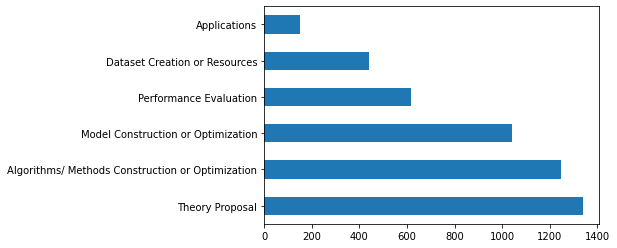

In [ ]:
ax=df.Labels.value_counts().plot(kind='barh')
fig = ax.get_figure()
fig.savefig("score.png");

In [ ]:
def utils_preprocess_text(txt, lst_regex=None, punkt=True, lower=True, lst_stopwords=None, stemm=False, lemm=True):
    if lst_regex is not None: 
        for regex in lst_regex:
            txt = re.sub(regex, '', txt)
  
    ### separate sentences with '. '
    txt = re.sub(r'\.(?=[^ \W\d])', '. ', str(txt))
    ### remove punctuations and characters
    txt = re.sub(r'[^\w\s]', '', txt) if punkt is True else txt
    ### strip
    txt = " ".join([word.strip() for word in txt.split()])
    ### lowercase
    txt = txt.lower() if lower is True else txt
            
    ## Tokenize (convert from string to list)
    lst_txt = txt.split()

    ## remove Stopwords
    if lst_stopwords is not None:
        lst_txt = [word for word in lst_txt if word not in lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if stemm is True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_txt = [ps.stem(word) for word in lst_txt]
                
    ## Lemmatization (convert the word into root word)
    if lemm is True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_txt = [lem.lemmatize(word) for word in lst_txt]

    ## remove leftover Stopwords
    if lst_stopwords is not None:
        lst_txt = [word for word in lst_txt if word not in lst_stopwords]
            
    ## back to string from list
    txt = " ".join(lst_txt)
    return txt

In [ ]:
df['Clean_Contributions'] = df['Contributions'].apply( lambda x:utils_preprocess_text(x, stemm = False, lemm = True, lst_stopwords=stopwords))
df.head()

,Contributions,Source,Labels,Year,Clean_Contributions
0,We propose a Combinatorial visuaL Analytics sy...,IPM,Model Construction or Optimization,2018,propose combinatorial visual analytics system ...
1,we performed a transcriptome analysis of glome...,IPM,Performance Evaluation,2018,performed transcriptome analysis glomerular ti...
2,We conducted both in vitro and in vivo experim...,IPM,Theory Proposal,2018,conducted vitro vivo experiment investigate ro...
3,we report accumulation of actinoplanic acid A ...,IPM,Theory Proposal,2018,report accumulation actinoplanic acid 2 novel ...
4,we have identified the APL cluster in other ba...,IPM,Theory Proposal,2018,identified apl cluster bacterial genome withou...


In [ ]:
dff = df[['Clean_Contributions','Labels']].dropna()
dff

,Clean_Contributions,Labels
0,propose combinatorial visual analytics system ...,Model Construction or Optimization
1,performed transcriptome analysis glomerular ti...,Performance Evaluation
2,conducted vitro vivo experiment investigate ro...,Theory Proposal
3,report accumulation actinoplanic acid 2 novel ...,Theory Proposal
4,identified apl cluster bacterial genome withou...,Theory Proposal
...,...,...
4832,analyse author demographic trait related usage...,Theory Proposal
4833,research proposal consequently explores questi...,Theory Proposal
4834,propose reordering mechanism learn reordering ...,Dataset Creation or Resources
4835,propose novel hierarchical fusion model addres...,Model Construction or Optimization


In [ ]:
#Save File
cleaned_data = dff[['Clean_Contributions', 'Labels']]
cleaned_data.to_csv('/content/CleanIPM_ACL_(5Categories).csv')

In [ ]:
#4 columns clean data file
df['All_Clean'] = df['Contributions'].apply( lambda x:utils_preprocess_text(x, stemm = False, lemm = True, lst_stopwords=stopwords))
df.head()
dff = df[['All_Clean','Labels','Source', 'Year']].dropna()
dff

#Save File
all_cleaned_data = dff[['All_Clean', 'Labels','Source', 'Year']]
all_cleaned_data.to_csv('/content/All_Clean.csv')

In [ ]:
from spacy.lang.en import English
nlp = English()
import en_core_web_sm
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
nlp = en_core_web_sm.load()
def func1(str1,nlp):
    return nlp(str1)

dff["parsed"] = dff['Clean_Contributions'].map(lambda x:func1(x,nlp))

In [ ]:
spacy.displacy.render(dff["parsed"][1], style='ent', jupyter=True)


In [ ]:
displacy.render(dff["parsed"][0], style='dep', jupyter=True,options={'distance': 140})

In [ ]:
options = {'compact': True, 'bg': 'violet','distance': 140,
           'color': 'white', 'font': 'Trebuchet MS'}
displacy.render(dff["parsed"][1], jupyter=True, style='dep', options=options)

In [ ]:
doc = {}
Token_dict = {}
for i in dff["Labels"].dropna().unique():
  print(i)
  
  Token = ''
  for j in dff.loc[dff['Labels'] == i]["parsed"]:
    Token += str(j)
  Token_dict[i] = Token
  nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
  nlp = en_core_web_sm.load()
  doc[i] = nlp(Token) 
  for token in doc[i]:
      print(token, end="|")
  print("\n")

Model Construction or Optimization
propose|combinatorial|visual|analytics|system|information|retrieval|evaluation|claire|allows|exploring|making|sense|performance|large|amount|ir|system|order|quickly|intuitively|grasp|system|configuration|preferred|contribution|different|component|component|interact|togethermodeled|human|aa|mouse|adaptation|historic|ârunt|diseaseâ|infusion|lymph|node|ln|cell|recipient|mismatched|major|histocompatibility|complex2324|minor|histocompatibility|antigen25|locus|produce|severe|pancytopenia|bm|failureanalyze|matrix|deposition|muscle|fibroblast|derived|patient|dmd|highlighting|model|difference|detectable|traditional|2d|assayswat|model|modified|better|simulate|depressional|wetlandmodel|new|tool|quantify|wetland|function|broad|spatial|scaledetection|false|spam|review|using|collusive|community|detection|frameworkpredictive|model|help|forecasting|company|success|futuredeveloped|model|address|belief|online|social|support|cognition|emotion|crawling|content|analysis|u

In [ ]:
#Named Entity Recognition
for i in doc:
  for ent in doc[i].ents:
      print([i,ent.text , ent.label_])

['Model Construction or Optimization', 'diseaseâ', 'GPE']
['Model Construction or Optimization', 'complex2324', 'PERSON']
['Model Construction or Optimization', 'bm', 'PERSON']
['Model Construction or Optimization', 'assayswat', 'PERSON']
['Model Construction or Optimization', 'juuti conti', 'PERSON']
['Model Construction or Optimization', '2018', 'DATE']
['Model Construction or Optimization', 'blockchain', 'GPE']
['Model Construction or Optimization', 'blockchain', 'GPE']
['Model Construction or Optimization', 'lmdiv outperform', 'PERSON']
['Model Construction or Optimization', 'three', 'CARDINAL']
['Model Construction or Optimization', 'misogyny social medium', 'PERSON']
['Model Construction or Optimization', 'us', 'GPE']
['Model Construction or Optimization', 'laplacian', 'NORP']
['Model Construction or Optimization', 'mmds', 'ORG']
['Model Construction or Optimization', 'lexicon disregard', 'PERSON']
['Model Construction or Optimization', 'three', 'CARDINAL']
['Model Construction o

In [ ]:
import spacy
from spacy.symbols import nsubj, VERB

nlp = spacy.load("en_core_web_sm")

# Finding a verb with a subject
verbs_dict = {}

for i in doc:
  verbs = set()
  for possible_subject in doc[i]:
      if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
          verbs.add(possible_subject.head)
  verbs_dict[i] = verbs
  print(i,":",verbs_dict[i])

Model Construction or Optimization : {take, adapt, hit, focused, identifies, conduct, selfpaced, read, outperform, blockchainbased, identify, allowed, identify, improve, enable, take, explain, extracted, proposed, parameterized, improves, based, included, recommendationunsupervised, used, extract, take, dictate, modelpropose, applied, encoded, ensure, describes, produce, predicted, learn, solves, learns, learn, tackled, establish, made, learn, mismatched, adapted, transformerbased, take, regulate, made, apply, provides, extract, identify, generated, explain, generated, achieve, show, ftof, improves, classified, result, datasets, generated, attributed, supervised, predict, train, contains, learn, develop, develop, sentencedevelop, documentdesign, captured, unsupervised, twitterexperimented, datasets, executes, use, extract, predict, predict, make, inspired, used, learned, considers, use, assigns, ranked, give, tailor, inheritancebased, summarize, know, fused, annotated, proposed, perfor

In [ ]:
# Most Common Nouns Extraction
from collections import defaultdict, Counter

nouns = []
for i in doc:
  for token in doc[i]:
    if token.pos_ == 'NOUN':
      nouns.append(token.text)
      nouns_tally = Counter(nouns)
  print("\n",i)
  Noun = pd.DataFrame(nouns_tally.most_common(), columns=['Noun', 'count'])
  print("\n",Noun[:20])




 Model Construction or Optimization

               Noun  count
0            model    628
1         language    109
2             word    105
3      information    100
4         approach     97
5          network     95
6             task     95
7           system     79
8             data     69
9   representation     66
10            text     66
11       framework     64
12       knowledge     60
13        training     56
14        sentence     55
15       attention     55
16     translation     55
17     performance     52
18         feature     51
19            user     44

 Performance Evaluation

               Noun  count
0            model    827
1      performance    161
2         language    160
3             word    156
4             task    154
5         approach    144
6           system    123
7             data    121
8          network    118
9      information    116
10          method    106
11            text    101
12  representation     95
13      evaluation     9

In [ ]:
#Most Common Verbs Extraction 
verbs = []
for i in doc:
  for token in doc[i]:

    if token.pos_ == 'VERB':
      verbs.append(token.text)
      verbs_tally = Counter(verbs)
  print("\n",i)
  Verb = pd.DataFrame(verbs_tally.most_common(), columns=['verb', 'count'])
  print("\n",Verb[:20])



 Model Construction or Optimization

             verb  count
0          based     99
1          using     87
2            can     76
3       learning     58
4       proposed     44
5          learn     37
6        improve     30
7     pretrained     30
8           used     25
9      embedding     23
10        shared     21
11      existing     20
12      modeling     20
13     including     18
14       learned     18
15       trained     17
16     generated     17
17      identify     16
18           set     16
19  unsupervised     16

 Performance Evaluation

           verb  count
0        using    146
1        based    119
2          can    118
3     proposed    104
4     learning     75
5     existing     50
6      improve     47
7         used     46
8     evaluate     43
9        learn     41
10         set     36
11        show     36
12  pretrained     36
13     trained     36
14   including     34
15      shared     33
16   embedding     32
17         use     27
18   generat

# Training model


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import * 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Splitting data into training and test set

X = dff.Clean_Contributions
y = dff.Labels
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size = 0.8, shuffle = True)
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)
print(y_train.value_counts())

Shapes of X_train, y_train:  (3869,) (3869,)
Shapes of X_test, y_test:  (968,) (968,)
Theory Proposal                                     1081
Algorithms/ Methods Construction or Optimization     987
Model Construction or Optimization                   824
Performance Evaluation                               506
Dataset Creation or Resources                        339
Applications                                         132
Name: Labels, dtype: int64


In [ ]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [ ]:
my_tags = list(dff["Labels"].drop_duplicates().values)
(my_tags)

['Model Construction or Optimization',
 'Performance Evaluation',
 'Theory Proposal',
 'Applications',
 'Algorithms/ Methods Construction or Optimization',
 'Dataset Creation or Resources']

In [ ]:
nb.fit(X_train, y_train)

from sklearn.metrics import * 

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.44421487603305787
                                                  precision    recall  f1-score   support

              Model Construction or Optimization       0.39      0.77      0.52       259
                          Performance Evaluation       0.00      0.00      0.00        18
                                 Theory Proposal       1.00      0.01      0.02       103
                                    Applications       0.51      0.30      0.38       217
Algorithms/ Methods Construction or Optimization       0.71      0.09      0.16       112
                   Dataset Creation or Resources       0.50      0.59      0.54       259

                                        accuracy                           0.44       968
                                       macro avg       0.52      0.29      0.27       968
                                    weighted avg       0.54      0.44      0.39       968



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5485537190082644
                                                  precision    recall  f1-score   support

              Model Construction or Optimization       0.55      0.58      0.56       259
                          Performance Evaluation       0.00      0.00      0.00        18
                                 Theory Proposal       0.62      0.39      0.48       103
                                    Applications       0.58      0.62      0.60       217
Algorithms/ Methods Construction or Optimization       0.47      0.24      0.32       112
                   Dataset Creation or Resources       0.53      0.69      0.60       259

                                        accuracy                           0.55       968
                                       macro avg       0.46      0.42      0.43       968
                                    weighted avg       0.54      0.55      0.53       968



In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5340909090909091
                                                  precision    recall  f1-score   support

              Model Construction or Optimization       0.55      0.54      0.54       259
                          Performance Evaluation       0.00      0.00      0.00        18
                                 Theory Proposal       0.73      0.34      0.46       103
                                    Applications       0.60      0.55      0.57       217
Algorithms/ Methods Construction or Optimization       0.44      0.23      0.30       112
                   Dataset Creation or Resources       0.48      0.76      0.59       259

                                        accuracy                           0.53       968
                                       macro avg       0.47      0.40      0.41       968
                                    weighted avg       0.54      0.53      0.52       968



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

random_forest = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('randfor',RandomForestClassifier(n_estimators=7, max_depth=100)),
               ])
random_forest.fit(X_train, y_train)


y_pred = random_forest.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.5134297520661157
                                                  precision    recall  f1-score   support

              Model Construction or Optimization       0.52      0.50      0.51       259
                          Performance Evaluation       0.00      0.00      0.00        18
                                 Theory Proposal       0.57      0.31      0.40       103
                                    Applications       0.59      0.58      0.59       217
Algorithms/ Methods Construction or Optimization       0.36      0.26      0.30       112
                   Dataset Creation or Resources       0.49      0.69      0.58       259

                                        accuracy                           0.51       968
                                       macro avg       0.42      0.39      0.40       968
                                    weighted avg       0.51      0.51      0.50       968



In [ ]:
#roohia

In [ ]:
from collections import Counter
Counter(" ".join(df['Clean_Contributions']).split()).most_common(30)

[('model', 1371),
 ('propose', 943),
 ('method', 656),
 ('task', 621),
 ('approach', 491),
 ('data', 489),
 ('language', 488),
 ('system', 413),
 ('word', 408),
 ('information', 403),
 ('new', 394),
 ('can', 389),
 ('present', 385),
 ('novel', 377),
 ('network', 374),
 ('learning', 372),
 ('neural', 371),
 ('using', 370),
 ('based', 351),
 ('paper', 348),
 ('representation', 338),
 ('text', 335),
 ('performance', 331),
 ('sentence', 331),
 ('dataset', 293),
 ('different', 292),
 ('show', 288),
 ('proposed', 284),
 ('framework', 282),
 ('training', 271)]

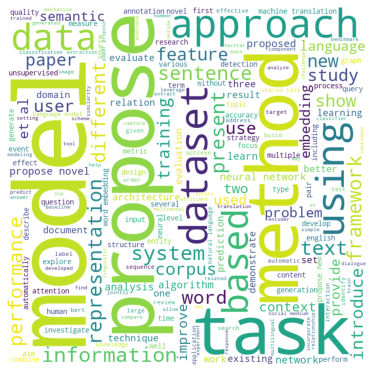

In [ ]:
#wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df['Clean_Contributions']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 2:
        print(i, n_gram_dic[i])

Streaming output truncated to the last 5000 lines.
('ftm', 'approach') 2
('sparsity', 'problem') 3
('text', 'data') 5
('benchmark', 'namely') 2
('text', 'categorization') 3
('weighted', 'semantic') 2
('sentence', 'modeled') 2
('summarization', 'system') 6
('using', 'standard') 3
('term', 'proposed') 2
('can', 'described') 2
('main', 'contribution') 6
('comprehensive', 'evaluation') 4
('evaluation', 'online') 2
('biomedical', 'text') 3
('method', 'unified') 2
('feature', 'set') 3
('sentiment', 'shifter') 2
('shifter', 'rule') 2
('statistical', 'linguistic') 2
('linguistic', 'knowledge') 7
('type', 'sentence') 2
('sentiment', 'information') 2
('information', 'word') 5
('sentiment', 'score') 2
('score', 'calculation') 2
('word', 'order') 12
('method', 'achieve') 2
('feature', 'vector') 2
('vector', 'method') 2
('method', 'integrates') 3
('order', 'tackle') 2
('tackle', 'word') 2
('data', 'typically') 2
('enhance', 'performance') 4
('new', 'topic') 2
('semantically', 'related') 2
('term', 

In [ ]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the file in data without first two rows as it is of no use.
data = pd.read_csv("All_Clean.csv")

#print the head of the data frame.
data.head()

,Unnamed: 0,All_Clean,Labels,Source,Year
0,0,propose combinatorial visual analytics system ...,Model Construction or Optimization,IPM,2018
1,1,performed transcriptome analysis glomerular ti...,Performance Evaluation,IPM,2018
2,2,conducted vitro vivo experiment investigate ro...,Theory Proposal,IPM,2018
3,3,report accumulation actinoplanic acid 2 novel ...,Theory Proposal,IPM,2018
4,4,identified apl cluster bacterial genome withou...,Theory Proposal,IPM,2018


In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)


In [ ]:
data.head()

,All_Clean,Labels,Source,Year
0,propose combinatorial visual analytics system ...,Model Construction or Optimization,IPM,2018
1,performed transcriptome analysis glomerular ti...,Performance Evaluation,IPM,2018
2,conducted vitro vivo experiment investigate ro...,Theory Proposal,IPM,2018
3,report accumulation actinoplanic acid 2 novel ...,Theory Proposal,IPM,2018
4,identified apl cluster bacterial genome withou...,Theory Proposal,IPM,2018


In [ ]:
# Checking the missing values in the dataset.
data.isnull().sum()

All_Clean    0
Labels       0
Source       0
Year         0
dtype: int64

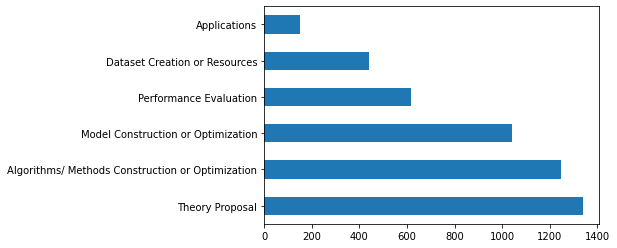

In [ ]:
# Let's calculate the percentage of each category.
data.Labels.value_counts(normalize=False)

#plot the bar graph of percentage categories
data.Labels.value_counts(normalize=False).plot.barh()
plt.show()

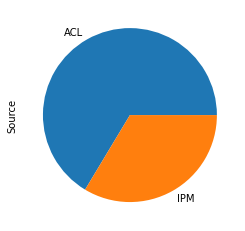

In [ ]:
#calculate the percentage of each Source category.
data.Source.value_counts(normalize=True)

#plot the pie chart of Source categories
data.Source.value_counts(normalize=True).plot.pie()
plt.show()

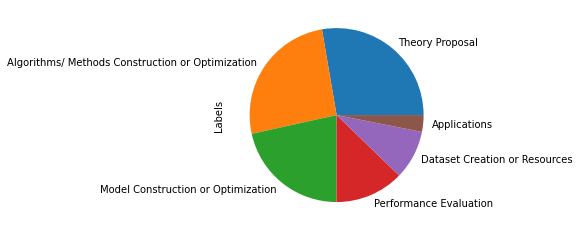

In [ ]:
#calculate the percentage of each Category category.
data.Labels.value_counts(normalize=True)

#plot the pie chart of Category categories
data.Labels.value_counts(normalize=True).plot.pie()
plt.show()

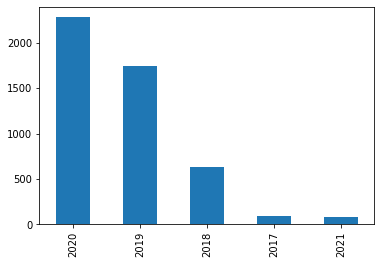

In [ ]:
#calculate the percentage of each Year category.
data.Year.value_counts(normalize=False)

#plot the bar chart of Year categories
data.Year.value_counts(normalize=False).plot.bar()
#data.sort_values('Year')
plt.show()

In [ ]:
data.Labels.describe()

count                4837
unique                  6
top       Theory Proposal
freq                 1340
Name: Labels, dtype: object

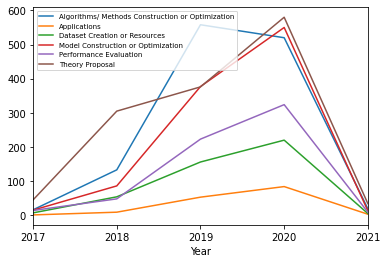

In [ ]:
#Line chart year and Categories

import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

ctdf = (df.reset_index()
          .groupby(['Year','Labels'], as_index=False)
          .count()
          .rename(columns={'index':'ct'})
       )

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ctdf.groupby('Labels'):
    data.plot(x='Year', y='ct', ax=ax, label=key)
    plt.legend(prop={"size":7})
  #"dataset/ resources creation", "theory proposal", "model construction or optimization", "algorithms/ methods construction or optimization","performance evaluation", "applications"